<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/I_94_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

metro = pd.read_csv('/content/drive/MyDrive/Dataset/Metro_Interstate_Traffic_Volume.csv')

In [4]:
print(metro.head())
print(metro.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [5]:
print(metro.info)

<bound method DataFrame.info of       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1

In [6]:
print(metro.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


<Axes: ylabel='Frequency'>

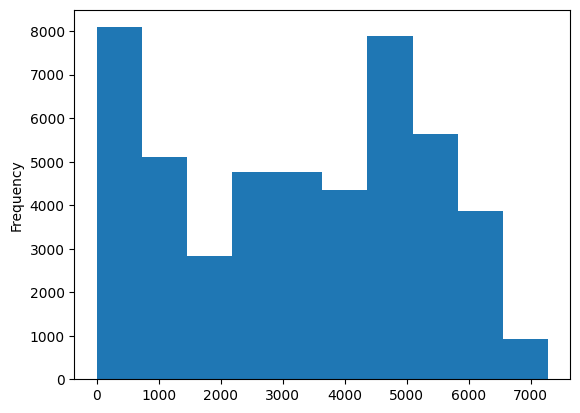

In [7]:
metro['traffic_volume'].plot.hist()

In [8]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [10]:
metro['date_time'].dt.hour.sort_index()

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [11]:

metro['date_time'] = pd.to_datetime(metro['date_time'])

day = metro.copy()[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
print(day.shape)

night = metro.copy()[(metro['date_time'].dt.hour >= 19) | (metro['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


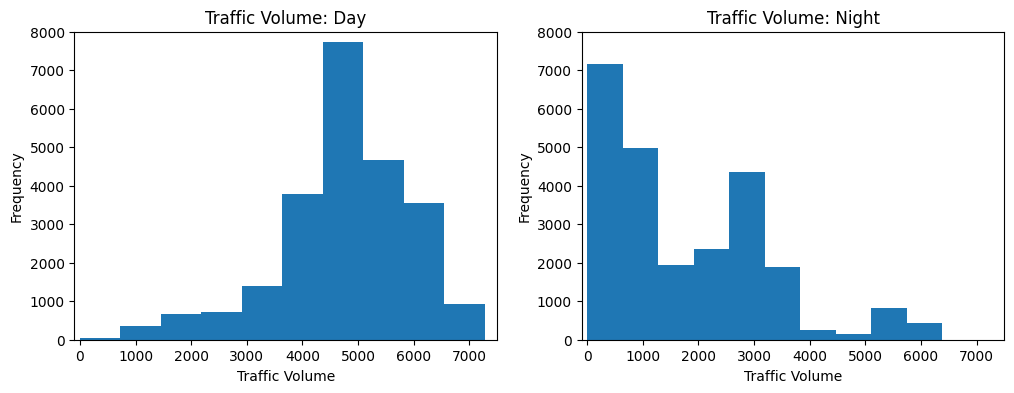

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

We can see from the histograms that the traffic volume at night is most heavy at the start of the night as we would expect and then drops off.

In [13]:
day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [15]:
print(metro['date_time'].tail(10))

48194   2018-09-30 15:00:00
48195   2018-09-30 15:00:00
48196   2018-09-30 16:00:00
48197   2018-09-30 17:00:00
48198   2018-09-30 18:00:00
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, dtype: datetime64[ns]


So now we are converting our date_time col values to month values and storming them in a new column called month. 

We are then calculating the average for all colmuns by month and plotting the average traffic volume by month in a line graph using the pandas method.

<ipython-input-16-764446113c2d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = metro.groupby('month').mean()


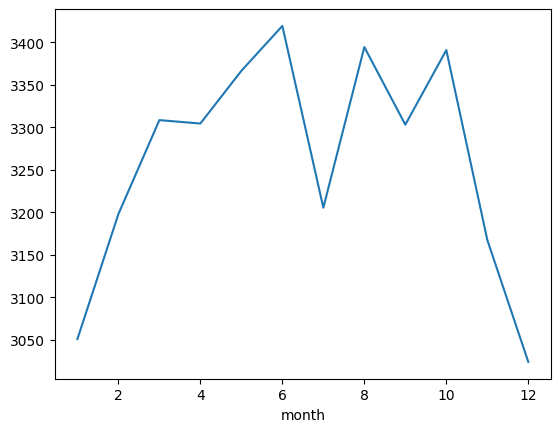

In [16]:
metro['month'] = metro['date_time'].dt.month
by_month = metro.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

<ipython-input-17-764446113c2d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = metro.groupby('month').mean()


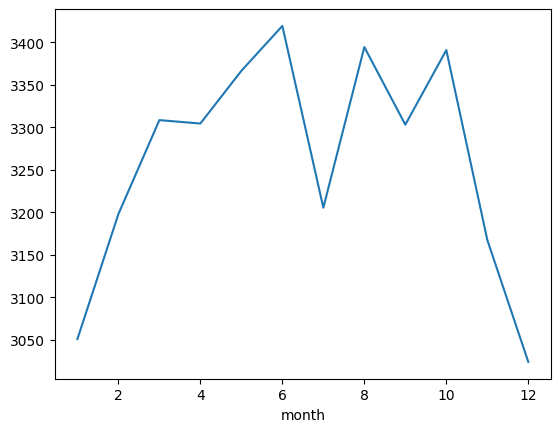

In [17]:
metro['month'] = metro['date_time'].dt.month
by_month = metro.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

Use pandas' Categorical method to convert string to category, then to codes

In [18]:
metro['weather_description_code'] = metro['weather_description'].astype('category').cat.codes


In [19]:
metro['weather_description_code'].value_counts()


27    11665
17     5950
19     5081
2      4666
24     3461
13     3372
4      1956
16     1946
1      1726
18     1664
7      1360
11     1100
5       912
21      673
3       651
10      616
9       467
30      293
20      136
31      125
8        64
33       63
35       54
23       52
36       37
29       20
37       18
34       15
12       13
22       13
15       11
14        6
25        6
0         4
28        3
32        2
6         2
26        1
Name: weather_description_code, dtype: int64

In [20]:
metro['weather_description_code'].nunique()

38

In [21]:
metro['weather_description_code'].describe()

count    48204.000000
mean        16.540536
std          8.970108
min          0.000000
25%         10.000000
50%         17.000000
75%         27.000000
max         37.000000
Name: weather_description_code, dtype: float64

In [22]:
metro[['weather_description', 'weather_description_code']]

,weather_description,weather_description_code
0,scattered clouds,24
1,broken clouds,2
2,overcast clouds,19
3,overcast clouds,19
4,broken clouds,2
...,...,...
48199,broken clouds,2
48200,overcast clouds,19
48201,proximity thunderstorm,21
48202,overcast clouds,19


In [23]:
import seaborn as sns

In [24]:
sns.set_theme()

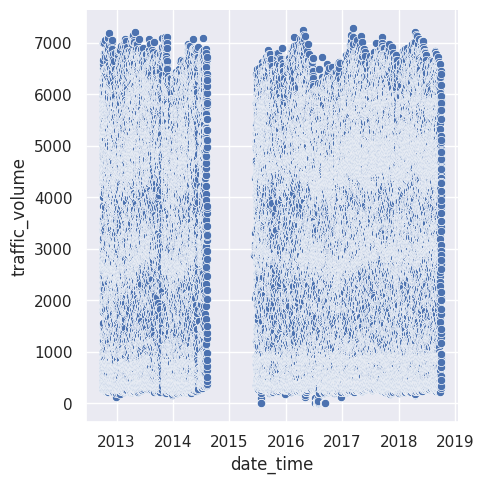

In [25]:
sns.relplot(data=metro, x='date_time', y='traffic_volume')

<ipython-input-26-ffcc36c9a096>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  only_july.groupby('year').mean()['traffic_volume'].plot.line()


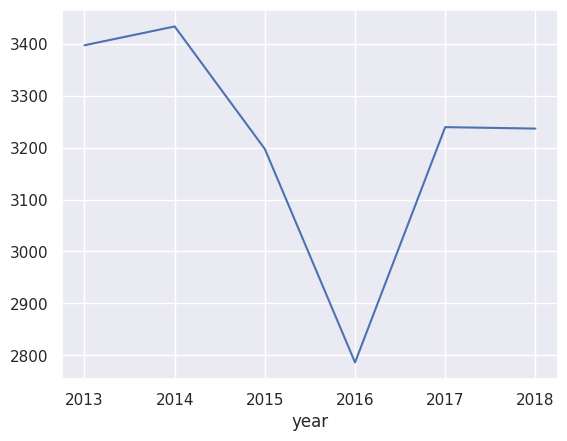

In [26]:
metro['year'] = metro['date_time'].dt.year
only_july = metro[metro['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

<ipython-input-27-ac5c63108ad5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  only_dec.groupby('year').mean()['traffic_volume'].plot.line()


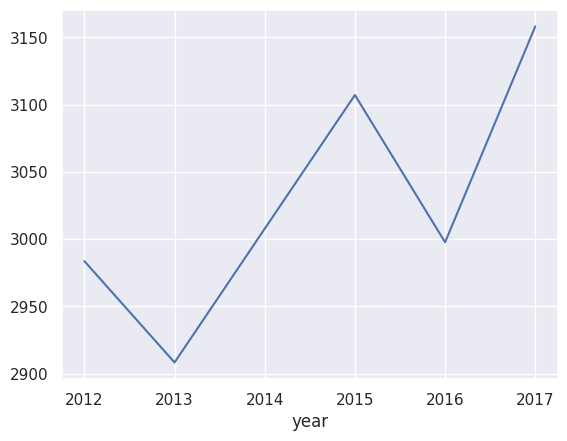

In [27]:
metro['year'] = metro['date_time'].dt.year
only_dec = metro[metro['month'] == 12]
only_dec.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

In [28]:
metro.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'month',
       'weather_description_code', 'year'],
      dtype='object')

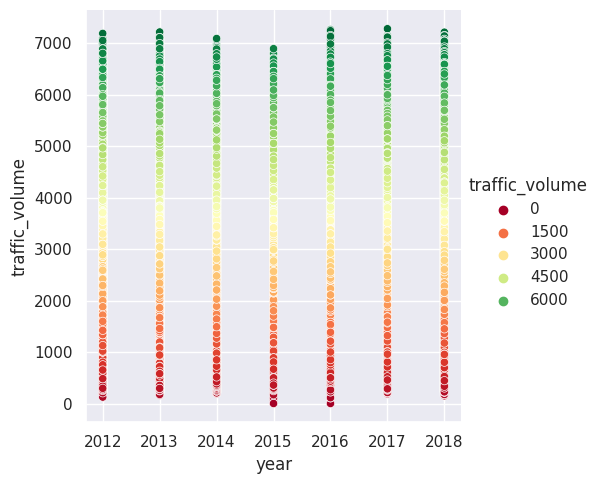

In [38]:
import seaborn as sns
sns.relplot(data=metro, x=metro['year'], y='traffic_volume', hue='traffic_volume', palette="RdYlGn")




In [35]:
metro['rain_1h'].value_counts()

0.00    44737
0.25      948
0.51      256
1.02      123
0.30      121
        ...  
1.28        1
1.47        1
4.66        1
2.08        1
2.35        1
Name: rain_1h, Length: 372, dtype: int64

<ipython-input-40-1c326ec6c180>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_day = metro.groupby('day_of_week').mean()


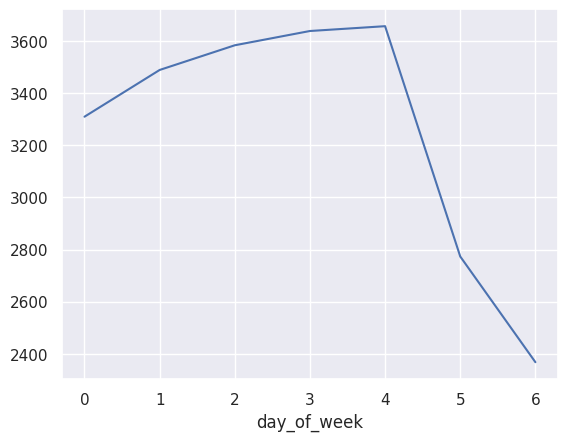

In [40]:
metro['day_of_week'] = metro['date_time'].dt.dayofweek
by_day = metro.groupby('day_of_week').mean()
by_day['traffic_volume'].plot.line()
plt.show()

In [42]:
metro['hour'] = metro['date_time'].dt.hour
bussiness_days = metro.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = metro.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


KeyError: ignored

<ipython-input-44-082bf053573c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour = metro.groupby('hour').mean()


<Axes: xlabel='hour'>

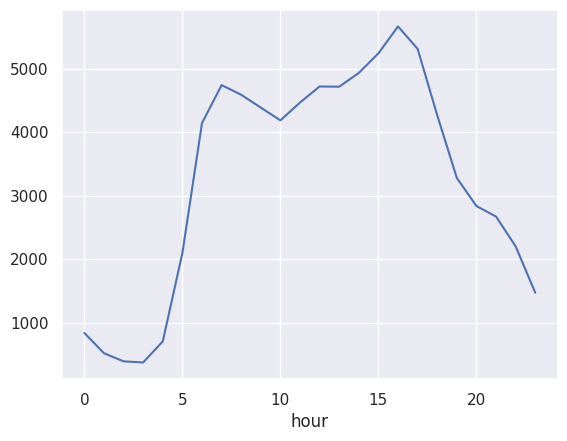

In [44]:
metro['hour'] = metro['date_time'].dt.hour
by_hour = metro.groupby('hour').mean()
by_hour['traffic_volume'].plot.line()

In [46]:
metro['hour'] = metro['date_time'].dt.hour
business_days = metro.copy()[metro['day_of_week'] <= 4]
weekend = metro.copy()[metro['day_of_week'] >= 5]

In [47]:
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

<ipython-input-47-5ab35c05dcda>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


(0.0, 8000.0)

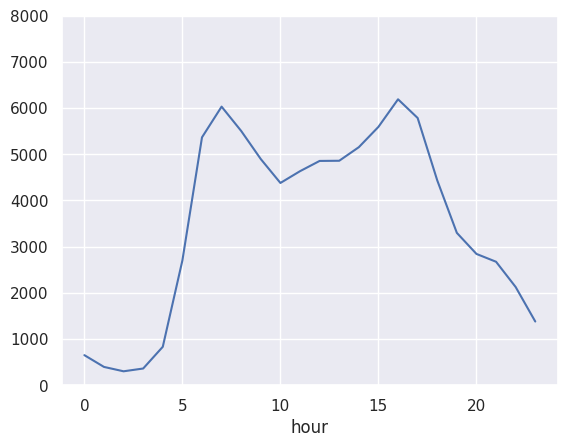

In [51]:
by_hour_business['traffic_volume'].plot.line()
plt.ylim(0,8000)

(0.0, 6000.0)

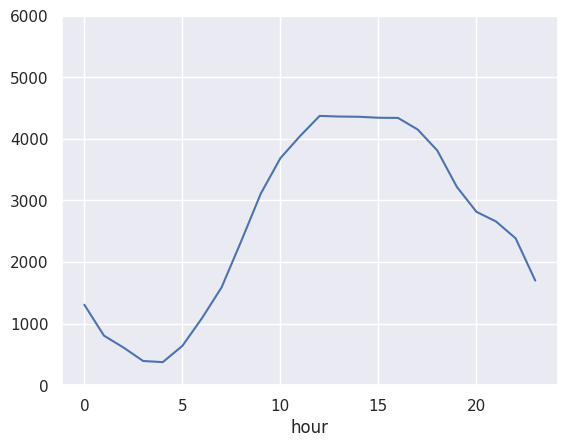

In [50]:
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(0,6000)

In [62]:
metro.corr()['traffic_volume']

<ipython-input-62-1a8a5805b67c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  metro.corr()['traffic_volume']


temp                        0.130299
rain_1h                     0.004714
snow_1h                     0.000733
clouds_all                  0.067054
traffic_volume              1.000000
month                      -0.002533
weather_description_code   -0.067507
year                        0.004753
day_of_week                -0.149544
hour                        0.352401
Name: traffic_volume, dtype: float64

<Axes: xlabel='traffic_volume', ylabel='hour'>

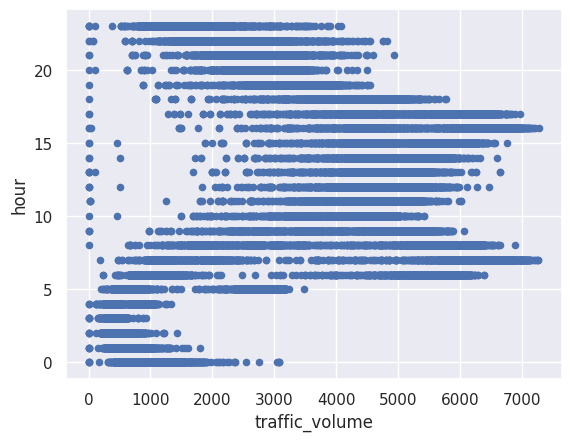

In [87]:
metro.plot.scatter('traffic_volume', 'hour')

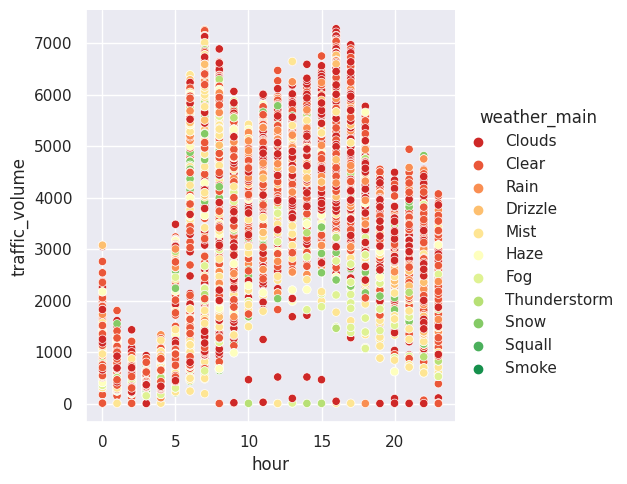

In [96]:
sns.relplot(data=metro, x='hour', y='traffic_volume', palette="RdYlGn", hue="weather_main")

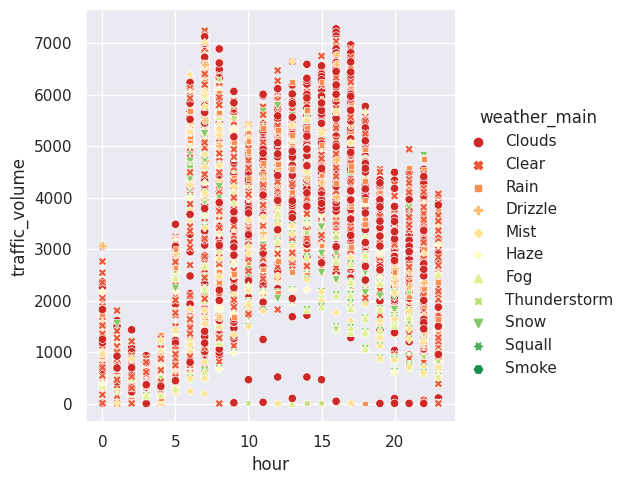

In [100]:
sns.relplot(data=metro, x='hour', y='traffic_volume', palette="RdYlGn", style="weather_main", hue="weather_main")

When it's cloudy

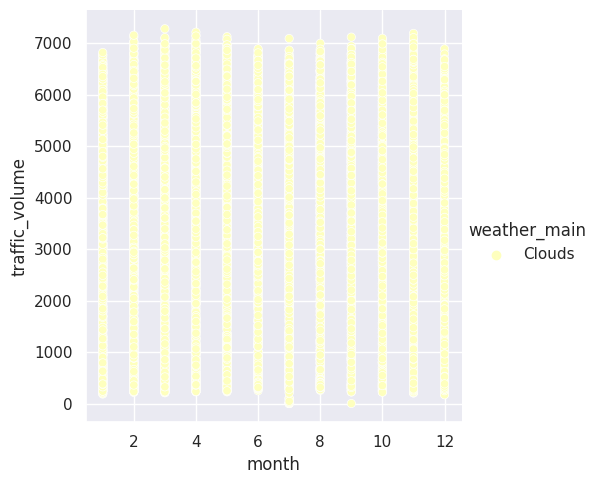

In [117]:
# Filter the DataFrame
clouds_data = metro[metro['weather_main'] == 'Clouds']

# Create the plot
sns.relplot(data=clouds_data, x='month', y='traffic_volume', style='weather_main', hue='weather_main', palette='RdYlGn')



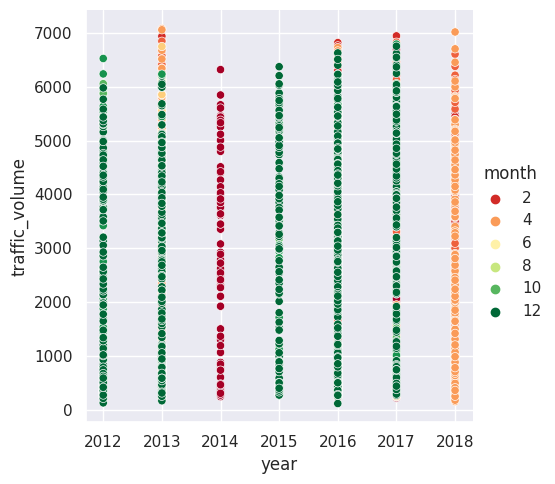

In [126]:
snow_data = metro[metro['weather_main'] == 'Snow']
sns.relplot(data=snow_data, x='year', y='traffic_volume', hue='month', palette='RdYlGn',)



<ipython-input-70-947f02d77dca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = metro.groupby('weather_main').mean()


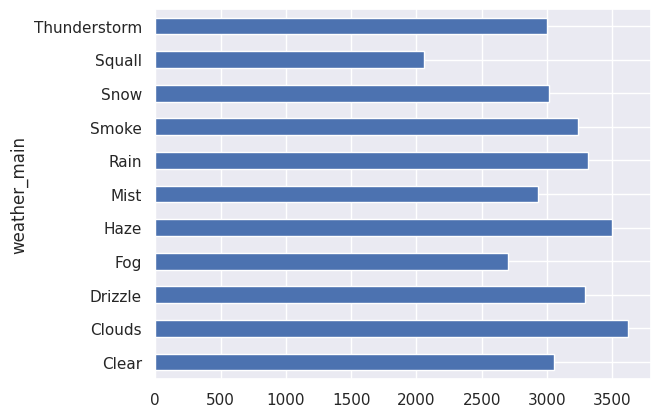

In [70]:
by_weather_main = metro.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()



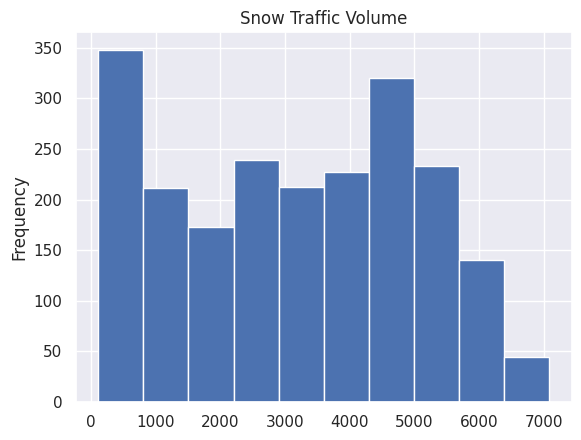

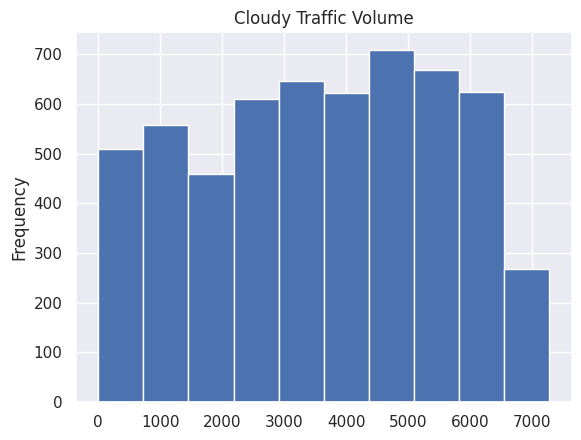

In [153]:

snow_data = metro[metro['weather_main'] == 'Snow']
by_snow_data = snow_data.groupby(metro['traffic_volume']).mean()
by_snow_data['traffic_volume'].plot.hist()
plt.title('Snow Traffic Volume')

plt.show()

clouds_data = metro[metro['weather_main'] == 'Clouds']
by_clouds_data = clouds_data.groupby(metro['traffic_volume']).mean()
by_clouds_data['traffic_volume'].plot.hist()
plt.title('Cloudy Traffic Volume')

plt.show()


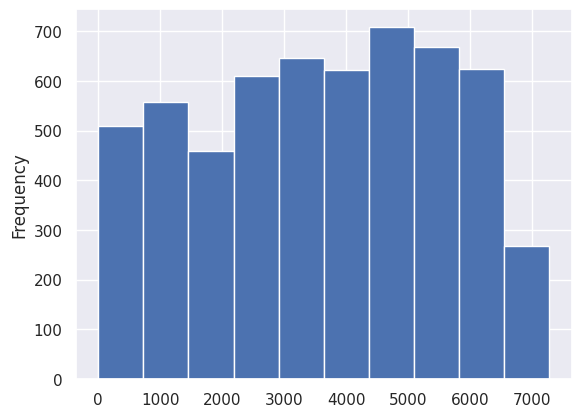

<ipython-input-83-3db5313798ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = metro.groupby('weather_description').mean()


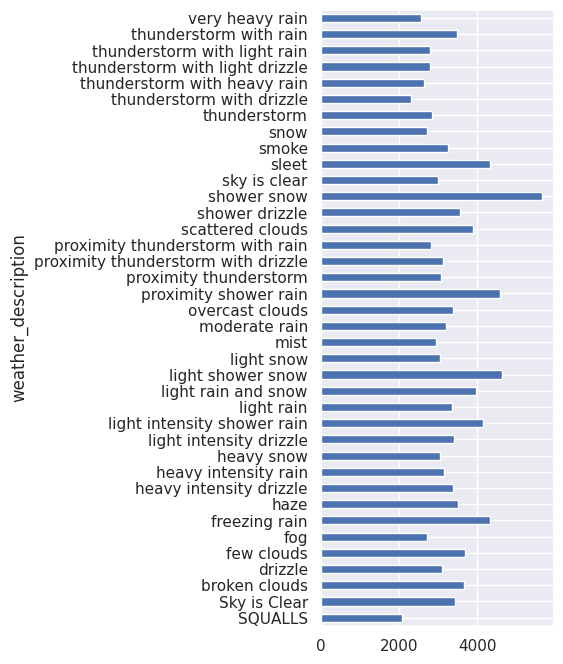

In [83]:
by_weather_description = metro.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(3,8))
plt.show()

In [76]:
metro.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'month',
       'weather_description_code', 'year', 'day_of_week', 'hour'],
      dtype='object')